# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [62]:
# student details 1: Yahav H. 8700

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:ChatGPT
Goal: Understanding the assigment, the data and the outcomes I will get.

Propmpt1:I need help selecting and creating different types of visualizations to explore relationships and patterns.
    
Propmpt2:I need help understanding if this is this considered a regression problem or classification? Please explain why.
    
Propmpt3:Based on the cross-validation results table, how can I identify which hyperparameter combination performed best and why.


AI agent name 2: AI agent name 2: GitHub Copilot  
Goal: Fixing syntax errors and improving the code.
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The goal of this project is to build a model that predicts house prices based on different features (such as size, location, room numbers and more). This is a regression problem, because we want to predict a continuous value – the price of a house.
The data comes from the training file (housing_train.csv) which contains many features for each house, including numerical and categorical values.
There is also a description file (house_pricing_description.txt) that explains each feature.
The test file (housing_test.csv) will be used to evaluate the model’s performance after training and tuning.


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

This cell loads the training and test datasets from CSV files and displays the first 5 rows of each for initial inspection.

In [ ]:
import pandas as pd

train_df = pd.read_csv("housing_train.csv")
test_df = pd.read_csv("housing_test.csv")

print("Training Data Sample:")
print(train_df.head(),"\n")

print("Test Data Sample:\n")
print(test_df.head(),"\n")


Training Data Sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250   

Test Data Sample:

   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.

This cell displays structural and statistical summaries of the training and test datasets, including column types, non-null counts, and basic statistics.

In [64]:
print("Train Data Info:")
train_df.info()

print("Test Data Info:\n")
test_df.info()

print("Train Data Description:\n")
print(train_df.describe())

print("Test Data Description:\n")
print(test_df.describe())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB
Test Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       4128 non-null   float64
 1   HouseAge     4128 non-null   float64
 2   AveRooms     4128 non-null   float64
 3   AveBedrms    4128 non-null   float6

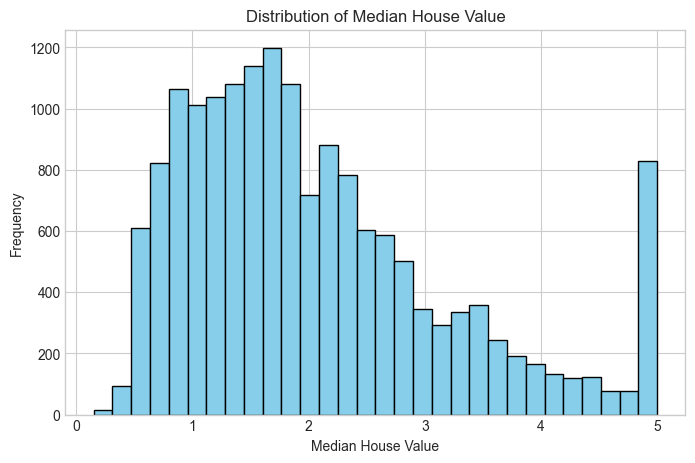

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(train_df['MedHouseVal'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

This histogram shows the distribution of median house values.  
Most house values are between 1 and 3, and there is a sudden peak at 5.0.  
This may suggest that 5.0 is a capped value in the data.

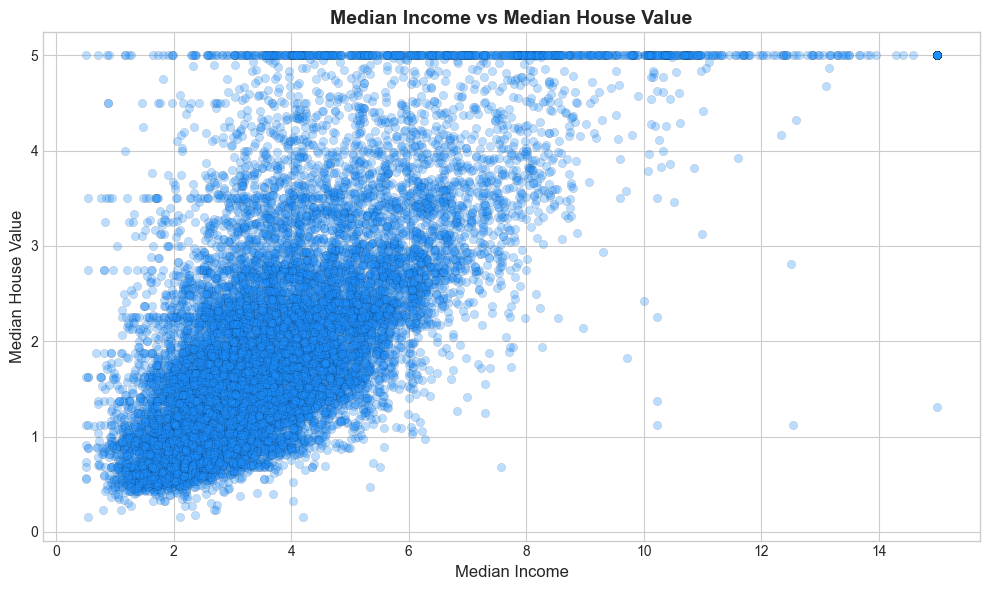

In [66]:
import seaborn as sns

plt.figure(figsize=(10, 6)) 
plt.style.use('seaborn-v0_8-whitegrid') 

plt.scatter(
    train_df['MedInc'], 
    train_df['MedHouseVal'], 
    alpha=0.3, 
    c='dodgerblue', 
    edgecolors='k',  
    linewidths=0.2
)

plt.title("Median Income vs Median House Value", fontsize=14, fontweight='bold')
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



This scatter plot shows the relationship between median income and median house value.  
There is a clear positive trend: when income increases, house prices also tend to increase.

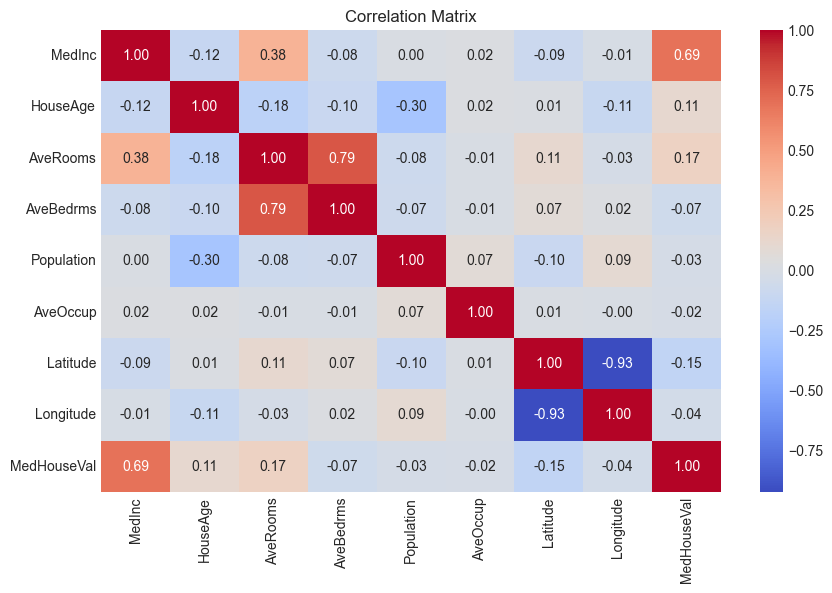

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


This heatmap shows how strongly each feature is related to the others.  
We see that MedInc has the highest positive correlation with MedHouseVal.  
Features like Latitude and Longitude have weaker or negative correlations.


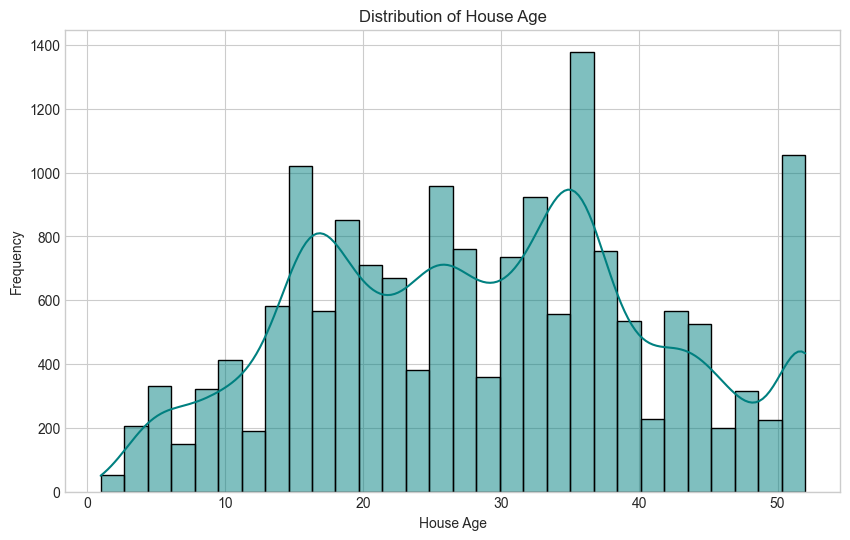

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['HouseAge'], bins=30, kde=True, color='teal')
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram shows the distribution of house ages.  
Houses of all ages are included, but some specific ages are more frequent, like around 15, 30, and 50 years.  
This may reflect construction trends in certain time periods.

## Part 3 - Experiments
You could add as many code cells as needed

These are all the relevant imports.

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [69]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    results.append({
        "Model": name,
        "Mean CV MSE": -scores.mean()
    })

algo_results_df = pd.DataFrame(results)
display(algo_results_df)

,Model,Mean CV MSE
0,Linear Regression,0.524861
1,Decision Tree,0.563718
2,Random Forest,0.268531


I compared three regression models: Linear Regression, Decision Tree, and Random Forest, using 5-fold cross-validation.  
Since Random Forest achieved the lowest Mean Squared Error (MSE), I selected it as the final model.  
I then continued by tuning its hyperparameters using GridSearchCV.

This cell builds a machine learning pipeline with scaling and Random Forest, then performs grid search with 5-fold cross-validation to find the best combination of hyperparameters.

In [70]:

X = train_df.drop("MedHouseVal", axis=1)
y = train_df["MedHouseVal"]
X = X.select_dtypes(include=[np.number])

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(random_state=42))
])

param_grid = {
    "regressor__n_estimators": [50, 100],
    "regressor__max_depth": [None, 10, 20],
    "regressor__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

This cell creates a new feature RoomsPerPerson and uses a scatter plot to visualize its relationship with the target variable Median House Value.



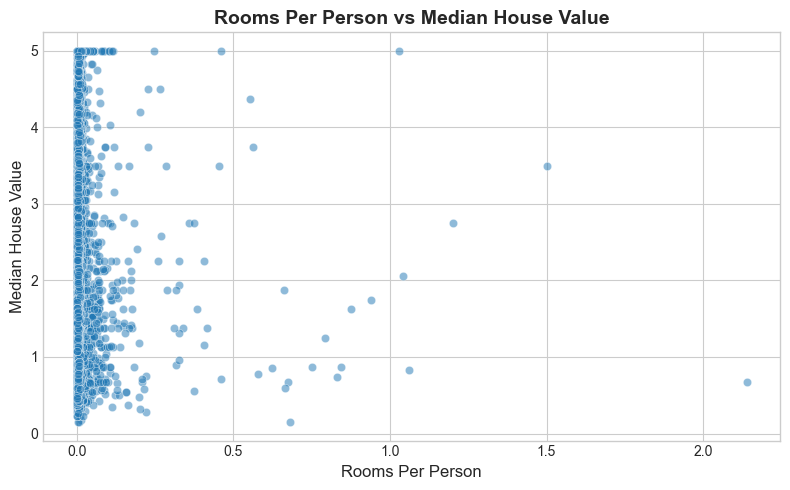

In [57]:
train_df['RoomsPerPerson'] = train_df['AveRooms'] / train_df['Population']
test_df['RoomsPerPerson'] = test_df['AveRooms'] / test_df['Population']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='RoomsPerPerson', y='MedHouseVal', alpha=0.5)
plt.title('Rooms Per Person vs Median House Value', fontsize=14, fontweight='bold')
plt.xlabel('Rooms Per Person', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

This cell displays the cross-validation results for each parameter combination, showing that the best test score was achieved with 100 estimators and no depth limit.

In [55]:
results_df = pd.DataFrame(grid_search.cv_results_)

results_df = results_df[[
    'param_regressor__n_estimators',
    'param_regressor__max_depth',
    'param_regressor__min_samples_split',
    'mean_test_score',
    'std_test_score',
    'mean_train_score'
]]

display(results_df)



,param_regressor__n_estimators,param_regressor__max_depth,param_regressor__min_samples_split,mean_test_score,std_test_score,mean_train_score
0,50,None,2,-0.272178,0.017956,-0.039241
1,100,None,2,-0.268869,0.017942,-0.037081
2,50,None,5,-0.271224,0.018265,-0.053790
3,100,None,5,-0.268409,0.018228,-0.051739
4,50,10,2,-0.301104,0.020046,-0.167276
5,100,10,2,-0.299384,0.021030,-0.165064
6,50,10,5,-0.301008,0.020012,-0.171672
7,100,10,5,-0.299358,0.021010,-0.169580
8,50,20,2,-0.271868,0.018528,-0.040573
9,100,20,2,-0.268798,0.018150,-0.038478


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

This cell trains the best model on the full training set and evaluates its performance (MSE = 0.0502), confirming the selected hyperparameters.

In [47]:
from sklearn.metrics import mean_squared_error


best_model = grid_search.best_estimator_
best_model.fit(X, y)

print("Best hyperparameters:")
print(grid_search.best_params_)

y_train_pred = best_model.predict(X)
train_mse = mean_squared_error(y, y_train_pred)
print(f"Train MSE: {train_mse:.4f}")


Best hyperparameters:
{'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Train MSE: 0.0502


This cell computes and prints the model’s MSE and R² on the training set, indicating excellent performance with low error (0.0502) and a high R² value (0.9621).

In [72]:
y_train_pred = best_model.predict(X)
train_mse = mean_squared_error(y, y_train_pred)
train_r2 = r2_score(y, y_train_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train MSE: 0.0502
Train R²: 0.9621


This cell visualizes predicted vs. actual house values on the training set, showing a tight clustering around the diagonal line which indicates strong model performance.



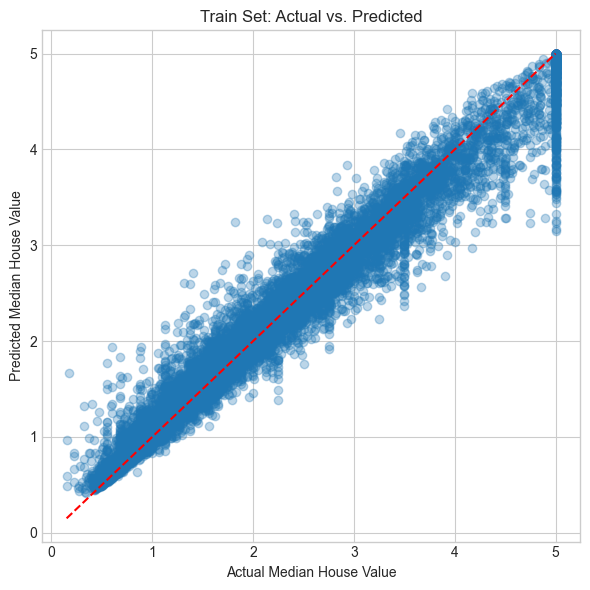

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_train_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Train Set: Actual vs. Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # קו אידיאלי
plt.grid(True)
plt.tight_layout()
plt.show()

## Part 5 - Apply on test and show model performance estimation

This cell evaluates the model on the test set, yielding an MSE of 0.2401 and R² of 0.8230, confirming that the model generalizes well.



In [77]:
test_df = pd.read_csv("housing_test.csv")

X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

X_test = X_test.select_dtypes(include=[np.number])
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MSE: 0.2401
Test R²: 0.8230


This cell creates a scatter plot comparing actual vs. predicted house values on the test set, showing strong alignment with the diagonal line and indicating good prediction accuracy.

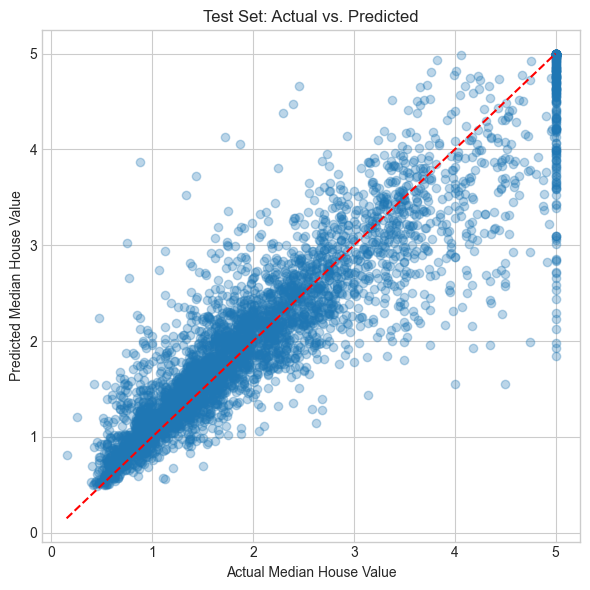

In [78]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Test Set: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.grid(True)
plt.tight_layout()
plt.show()